In [38]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [39]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv", sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [40]:
df.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

In [41]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


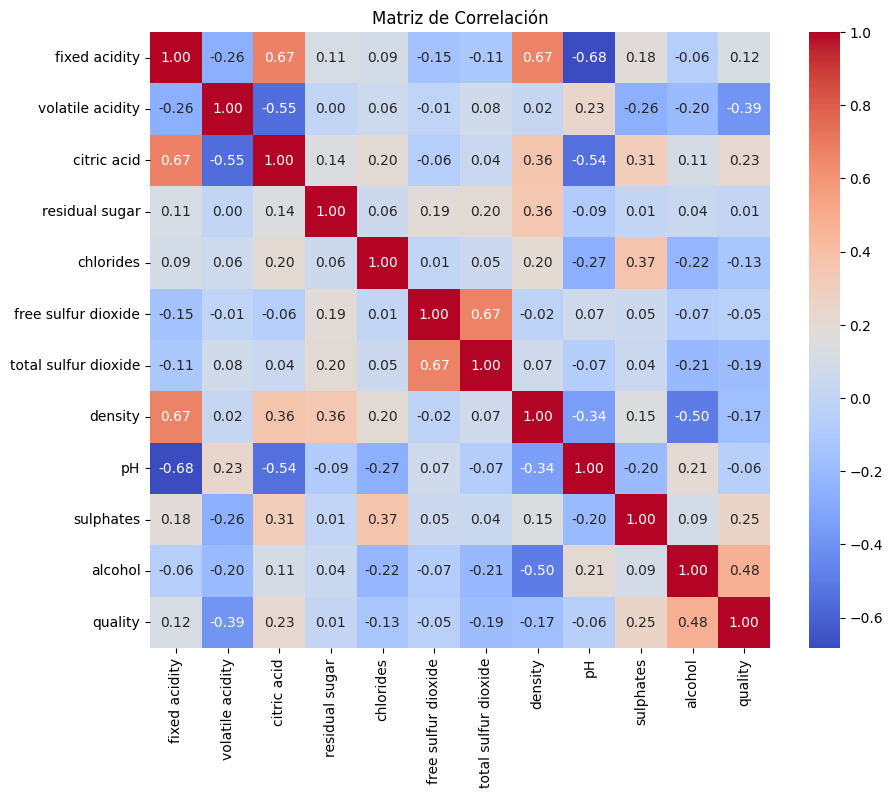

In [42]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

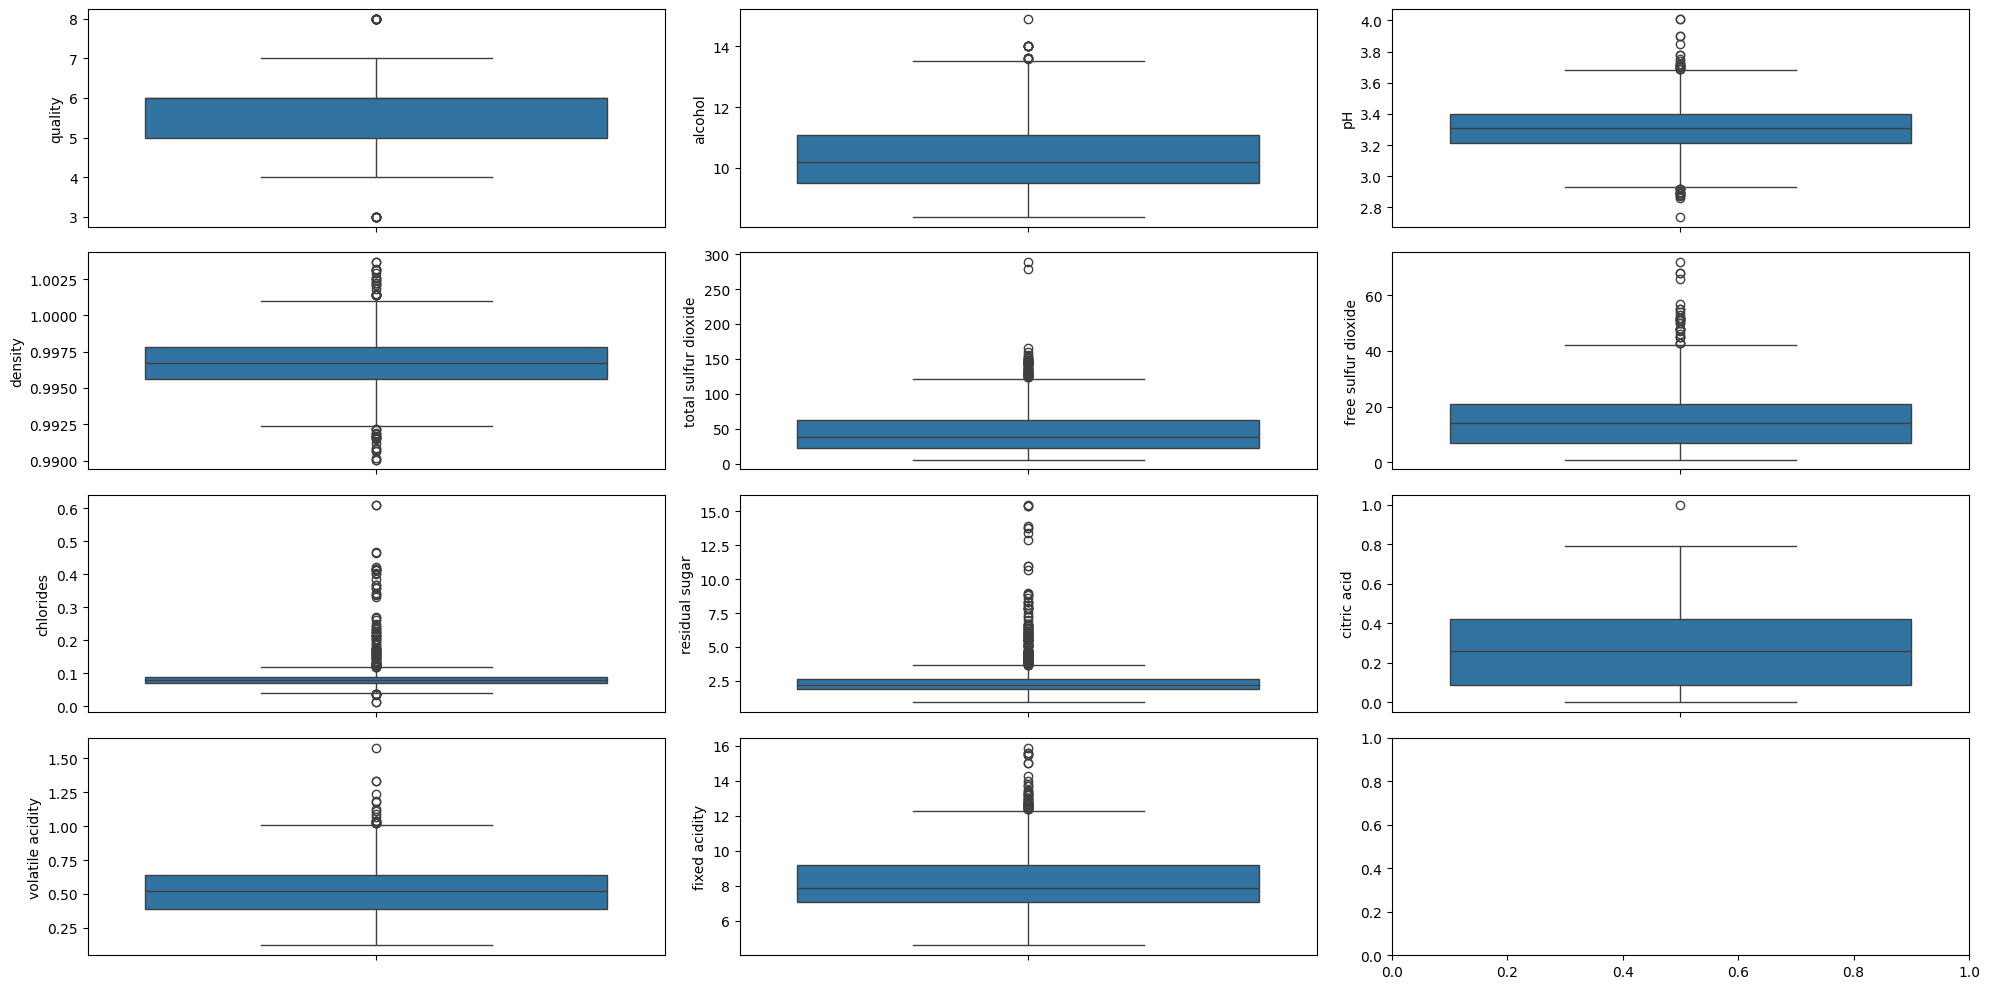

In [43]:
fig, axis = plt.subplots(4, 3, figsize = (20, 10))

sns.boxplot(ax = axis[0, 0], data = df, y = "quality")
sns.boxplot(ax = axis[0, 1], data = df, y = "alcohol")
sns.boxplot(ax = axis[0, 2], data = df, y = "pH")
sns.boxplot(ax = axis[1, 0], data = df, y = "density")
sns.boxplot(ax = axis[1, 1], data = df, y = "total sulfur dioxide")
sns.boxplot(ax = axis[1, 2], data = df, y = "free sulfur dioxide")
sns.boxplot(ax = axis[2, 0], data = df, y = "chlorides")
sns.boxplot(ax = axis[2, 1], data = df, y = "residual sugar")
sns.boxplot(ax = axis[2, 2], data = df, y = "citric acid")
sns.boxplot(ax = axis[3, 0], data = df, y = "volatile acidity")
sns.boxplot(ax = axis[3, 1], data = df, y = "fixed acidity")


plt.tight_layout()

plt.show()

In [44]:
Q1 = df['alcohol'].quantile(0.25)
Q3 = df['alcohol'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 13.5 y 7.1, con un rango intercuartílico de 1.6


In [45]:
df = df[df['alcohol'] <= 14]

In [46]:
Q1 = df['pH'].quantile(0.25)
Q3 = df['pH'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 3.68 y 2.92, con un rango intercuartílico de 0.19


In [47]:
upper_limit = 3.7
lower_limit = 2.9

# Calcular la media excluyendo los valores atípicos
media_sin_outliers = df[(df['pH'] >= lower_limit) & (df['pH'] <= upper_limit)]['pH'].mean()

# Reemplazar outliers por la media
df['pH'] = df['pH'].apply(
    lambda x: media_sin_outliers if (x < lower_limit or x > upper_limit) else x
)

In [48]:
Q1 = df['density'].quantile(0.25)
Q3 = df['density'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 1.0 y 0.99, con un rango intercuartílico de 0.0


In [49]:
upper_limit = 1
lower_limit = 0.9925

media_sin_outliers = df[(df['density'] >= lower_limit) & (df['density'] <= upper_limit)]['density'].mean()

df['density'] = df['density'].apply(
    lambda x: media_sin_outliers if (x < lower_limit or x > upper_limit) else x
)

In [50]:
Q1 = df['total sulfur dioxide'].quantile(0.25)
Q3 = df['total sulfur dioxide'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 122.0 y -38.0, con un rango intercuartílico de 40.0


In [51]:
df = df[df['total sulfur dioxide'] <= 125]

In [52]:
Q1 = df['free sulfur dioxide'].quantile(0.25)
Q3 = df['free sulfur dioxide'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 42.0 y -14.0, con un rango intercuartílico de 14.0


In [53]:
df = df[df['total sulfur dioxide'] <= 42]

In [54]:
Q1 = df['chlorides'].quantile(0.25)
Q3 = df['chlorides'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 0.12 y 0.04, con un rango intercuartílico de 0.02


In [55]:
upper_limit = 0.12
lower_limit = 0.04

media_sin_outliers = df[(df['chlorides'] >= lower_limit) & (df['chlorides'] <= upper_limit)]['chlorides'].mean()

df['chlorides'] = df['chlorides'].apply(
    lambda x: media_sin_outliers if (x < lower_limit or x > upper_limit) else x
)

In [56]:
Q1 = df['residual sugar'].quantile(0.25)
Q3 = df['residual sugar'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 3.4 y 1.0, con un rango intercuartílico de 0.6


In [57]:
df = df[df['residual sugar'] <= 3.4]

In [58]:
Q1 = df['citric acid'].quantile(0.25)
Q3 = df['citric acid'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 1.01 y -0.51, con un rango intercuartílico de 0.38


In [59]:
df = df[df["citric acid"] != 1]

In [60]:
Q1 = df['volatile acidity'].quantile(0.25)
Q3 = df['volatile acidity'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 1.03 y -0.01, con un rango intercuartílico de 0.26


In [61]:
df = df[df['volatile acidity'] <= 1]

In [62]:
Q1 = df['fixed acidity'].quantile(0.25)
Q3 = df['fixed acidity'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 13.1 y 3.5, con un rango intercuartílico de 2.4


In [63]:
df = df[df['fixed acidity'] <= 14]

In [64]:
def clasificar_calidad(valor):
    if valor <= 4:
        return 'baja'
    elif valor <= 6:
        return 'media'
    else:
        return 'alta'

df['clase'] = df['quality'].apply(clasificar_calidad)

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(['quality', 'clase'], axis=1)
y = df['clase']

# Escalar las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)


In [66]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8099173553719008

Confusion Matrix:
 [[ 18   0  21]
 [  0   0   8]
 [ 17   0 178]]

Classification Report:
               precision    recall  f1-score   support

        alta       0.51      0.46      0.49        39
        baja       0.00      0.00      0.00         8
       media       0.86      0.91      0.89       195

    accuracy                           0.81       242
   macro avg       0.46      0.46      0.46       242
weighted avg       0.78      0.81      0.79       242



In [67]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81


In [68]:
scores = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

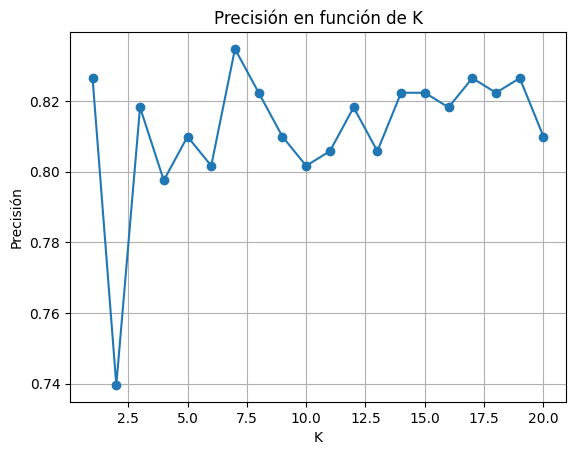

In [69]:
plt.plot(range(1, 21), scores, marker='o')
plt.title('Precisión en función de K')
plt.xlabel('K')
plt.ylabel('Precisión')
plt.grid(True)
plt.show()

In [70]:
best_k = scores.index(max(scores)) + 1
print(f"Mejor valor de K: {best_k}")

Mejor valor de K: 7


In [71]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [72]:
from sklearn.metrics import classification_report, confusion_matrix
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Matriz de confusión:
[[ 20   0  19]
 [  0   0   8]
 [ 13   0 182]]

Reporte de clasificación:
              precision    recall  f1-score   support

        alta       0.61      0.51      0.56        39
        baja       0.00      0.00      0.00         8
       media       0.87      0.93      0.90       195

    accuracy                           0.83       242
   macro avg       0.49      0.48      0.49       242
weighted avg       0.80      0.83      0.82       242



In [73]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.83
